<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº7
#### Federico Borello

# Introducción a la Estimación Espectral de Potencia / Power Spectrum Density (PSD)

La estimación espectral de potencia es una técnica fundamental en el análisis de señales, utilizada para identificar cómo se distribuye la potencia de una señal a través de diferentes frecuencias. Una de las metodologías más efectivas para llevar a cabo esta estimación es el **método de Welch**, que mejora la precisión y reduce el ruido en las estimaciones espectrales.

## Método de Welch

Este método se basa en dividir la señal original en segmentos superpuestos y aplicar una ventana a cada segmento antes de calcular su transformada de Fourier. A continuación, se promedian los espectros obtenidos para reducir la varianza del estimador.

### Procedimiento del Método de Welch

1. **Segmentación**: La señal se divide en $ L $ segmentos superpuestos. Cada segmento tiene una longitud $ M $ y se superponen por $ D $ puntos. Por ejemplo, si $ D = M/2 $, hay un 50% de solapamiento.

2. **Aplicación de Ventanas**: A cada segmento se le aplica una función ventana que reduce el efecto del borde del segmento sobre el cálculo del espectro. Esto ayuda a mitigar la pérdida de información que puede ocurrir al truncar los segmentos.

3. **Cálculo del Periodograma**: Para cada segmento, se calcula el periodograma mediante la transformada discreta de Fourier (DFT), seguido del cálculo del cuadrado de su magnitud, lo que proporciona estimaciones del espectro de potencia para cada segmento.

4. **Promedio**: Los periodogramas obtenidos para cada segmento se promedian, lo que reduce la varianza y proporciona una estimación más estable y precisa del espectro total.

### Proceso Ergodico

Un **proceso ergódico** es un tipo de proceso estocástico en el que las propiedades estadísticas pueden ser deducidas a partir de una única realización del proceso a lo largo del tiempo. Esto significa que el promedio temporal de una función de un proceso ergódico es igual al promedio sobre el espacio de estados. 

La ergodicidad implica que todos los estados del sistema son accesibles desde cualquier otro estado y que, con el tiempo, el sistema visitará todos los estados posibles. Esto es crucial para garantizar que las estimaciones estadísticas sean representativas del comportamiento general del sistema.

### Relación con el Método de Welch

La relación entre la ergodicidad y el método de Welch se puede entender en los siguientes puntos:

1. **Promedio Temporal vs. Promedio Espacial**: El método de Welch utiliza promedios temporales (los periodogramas calculados a partir de segmentos) para obtener un promedio espacial (la estimación final de la PSD). La ergodicidad garantiza que este promedio temporal sea representativo del comportamiento estadístico del proceso subyacente.

2. **Reducción del Ruido**: Al promediar múltiples estimaciones espectrales, el método de Welch se beneficia de la propiedad ergódica, ya que reduce la varianza en las estimaciones. Esto es especialmente útil en señales ruidosas, donde un solo cálculo podría no ser representativo.

3. **Relevancia en Procesos Estocásticos**: La ergodicidad es una suposición común en muchos modelos estocásticos utilizados en procesamiento de señales. Al aplicar el método de Welch, se asume implícitamente que las propiedades estadísticas del proceso son constantes a lo largo del tiempo, lo que permite generalizar las conclusiones obtenidas a partir de una única realización.

### Ventajas del Método de Welch

- **Reducción del Ruido**: Al promediar múltiples estimaciones espectrales, el método reduce significativamente el ruido que puede afectar a los resultados.
- **Flexibilidad**: Permite ajustar el grado de solapamiento y el tipo de ventana utilizada, lo que puede optimizarse según las características específicas de la señal analizada.
- **Mejor Resolución Frecuencial**: Aunque hay un compromiso entre la reducción del ruido y la resolución frecuencial, el método permite obtener un balance adecuado para muchas aplicaciones prácticas.

En resumen, el método de Welch es una herramienta poderosa para la estimación espectral que combina segmentación, aplicación de ventanas y promediado para proporcionar estimaciones precisas y confiables del contenido espectral de las señales. Su uso es ampliamente aceptado en diversas disciplinas donde el análisis frecuencial es esencial para comprender mejor las propiedades subyacentes de las señales.

In [1]:
# @title: SetUp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.io as sio
from scipy.io.wavfile import write

from IPython.display import Audio, display, HTML


def vertical_flaten(a):
    return a.reshape(a.shape[0], 1)


def display_audio_with_title(filename, title):
    audio = Audio(filename)
    html_content = f"""
    <div style="text-align: center;">
        <h2>{title}</h2>
        {audio._repr_html_()}
    </div>
    """
    display(HTML(html_content))

# Seteo las Señales

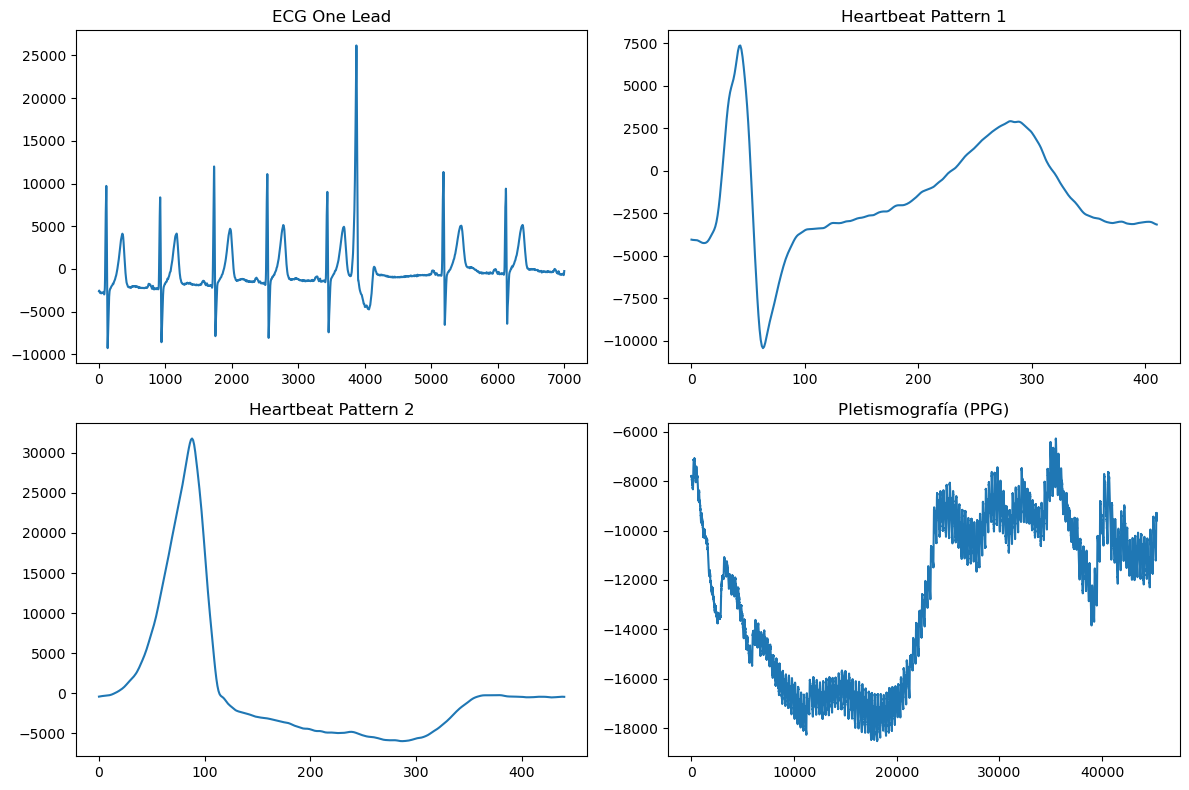

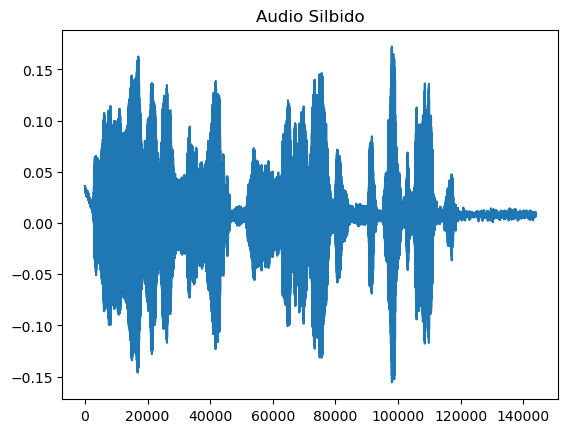

In [2]:
# Audio, ECG, PPG y Código original de la cátedra:
# https://github.com/marianux/pdstestbench/blob/4daeac9affd62217f4bafb8d7b8ec20834ba2a14/lectura_sigs.py

#######################################
# Lectura de Electrocardiograma (ECG) #
#######################################

fs_ecg = 1000  # Hz

mat_struct = sio.loadmat("./ECG_TP4.mat")

ecg_one_lead = vertical_flaten(mat_struct["ecg_lead"])
ecg_one_lead = ecg_one_lead[5000:12000]

hb_1 = vertical_flaten(mat_struct["heartbeat_pattern1"])
hb_2 = vertical_flaten(mat_struct["heartbeat_pattern2"])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(ecg_one_lead)
plt.title("ECG One Lead")

plt.subplot(2, 2, 2)
plt.plot(hb_1)
plt.title("Heartbeat Pattern 1")

plt.subplot(2, 2, 3)
plt.plot(hb_2)
plt.title("Heartbeat Pattern 2")


####################################
# Lectura de Pletismografía (PPG)  #
####################################

fs_ppg = 400  # Hz

# Cargar el archivo CSV como un array de NumPy
ppg = np.genfromtxt(
    "PPG.csv", delimiter=",", skip_header=1
)  # Omitir la cabecera si existe

plt.subplot(2, 2, 4)
plt.plot(ppg)
plt.title("Pletismografía (PPG)")
plt.tight_layout()
plt.show()

####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read("silbido.wav")
# fs_audio, wav_data = sio.wavfile.read("la cucaracha.wav")

plt.figure()
plt.plot(wav_data)
plt.title("Audio Silbido")

display_audio_with_title("silbido.wav", "Silbido")

# Cálculo de la Estimación Espectral de Potencia

In [3]:
def calculate_psd_welch(signal_data, fs):
    # Seteo los "bins" del metodo welch a N/5, siendo N el largo de la señal.
    f, Pxx = signal.welch(signal_data, fs, nperseg=len(signal_data) // 5)
    Pxx_normalized = Pxx / np.sum(Pxx)
    return f, Pxx_normalized


def calculate_psd_periodogram(signal_data, fs):
    # Seteo los "bins" del metodo welch a N/5, siendo N el largo de la señal.
    f, Pxx = signal.periodogram(signal_data, fs)
    Pxx_normalized = Pxx / np.sum(Pxx)
    return f, Pxx_normalized


def calculate_psd_with_fft(signal_data, fs):
    N = len(signal_data)
    fft_values = np.fft.fft(signal_data)
    fft_freqs = np.fft.fftfreq(N, 1 / fs)

    fft_psd = (np.abs(fft_values[: N // 2]) ** 2) / N
    fft_psd_normalized = fft_psd / np.sum(fft_psd)

    # Devolver solo frecuencias positivas.
    return fft_freqs[: N // 2], fft_psd_normalized


# Para ECG
f_ecg_welch, Pxx_ecg_welch = calculate_psd_welch(ecg_one_lead.flatten(), fs_ecg)
f_ecg_periodogram, Pxx_ecg_periodogram = calculate_psd_periodogram(
    ecg_one_lead.flatten(), fs_ecg
)

f_ecg_fft, fft_ecg = calculate_psd_with_fft(ecg_one_lead.flatten(), fs_ecg)

# Para PPG
f_ppg_welch, Pxx_ppg_welch = calculate_psd_welch(ppg.flatten(), fs_ppg)
f_ppg_periodogram, Pxx_ppg_periodogram = calculate_psd_periodogram(
    ppg.flatten(), fs_ppg
)

f_ppg_fft, fft_ppg = calculate_psd_with_fft(ppg.flatten(), fs_ppg)

# Para Audio
f_audio_welch, Pxx_audio_welch = calculate_psd_welch(wav_data, fs_audio)
f_audio_periodogram, Pxx_audio_periodogram = calculate_psd_periodogram(
    wav_data, fs_audio
)

f_audio_fft, fft_audio = calculate_psd_with_fft(wav_data, fs_audio)

In [4]:
# La suma de los espectros (energia normalizada) deberia ser igual a 1
print(f"Energia FFT: {np.sum(fft_ecg)}")
print(f"Energia PSD welch: {np.sum(Pxx_ecg_welch)}")
print(f"Energia PSD periodogram: {np.sum(Pxx_ecg_periodogram)}")

# La suma de los espectros (energia normalizada) deberia ser igual a 1
print(f"Energia FFT: {np.sum(fft_ppg)}")
print(f"Energia PSD welch: {np.sum(Pxx_ppg_welch)}")
print(f"Energia PSD periodogram: {np.sum(Pxx_ecg_periodogram)}")

# La suma de los espectros (energia normalizada) deberia ser igual a 1
print(f"Energia FFT: {np.sum(fft_audio)}")
print(f"Energia PSD welch: {np.sum(Pxx_audio_welch)}")
print(f"Energia PSD periodogram: {np.sum(Pxx_audio_periodogram)}")

Energia FFT: 0.9999999999999999
Energia PSD welch: 0.9999998807907104
Energia PSD periodogram: 1.0000001192092896
Energia FFT: 1.0
Energia PSD welch: 1.0
Energia PSD periodogram: 1.0000001192092896
Energia FFT: 1.0000000000000002
Energia PSD welch: 0.9999999403953552
Energia PSD periodogram: 1.0


Los cálculos de la energía del espectro se realizan para garantizar que todos los espectros estén normalizados, lo que permite compararlos de manera justa y efectiva.

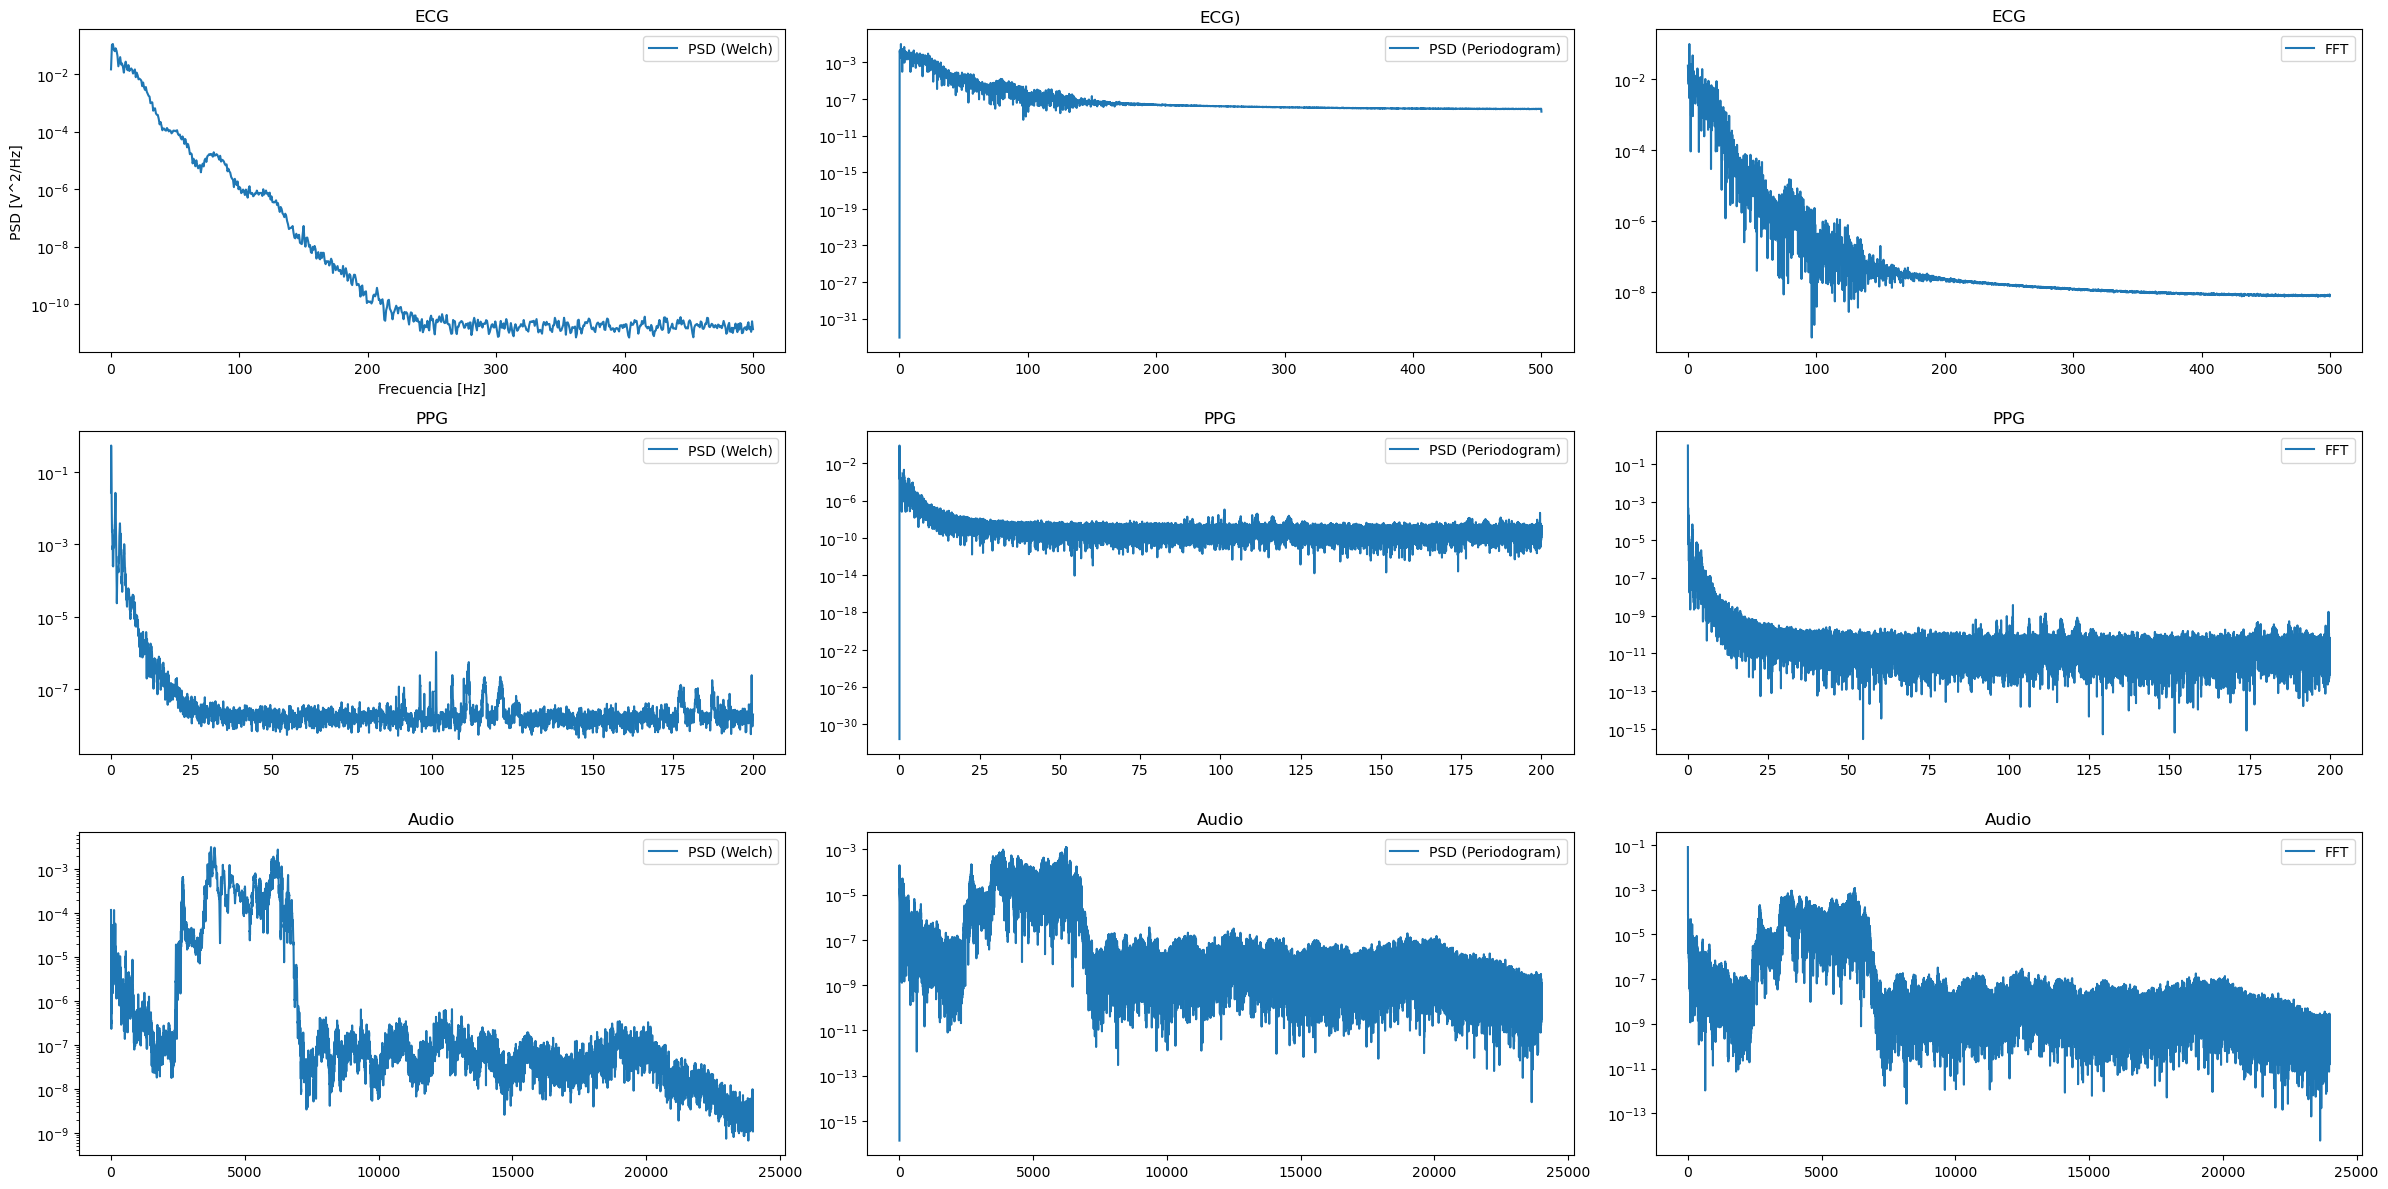

In [5]:
plt.figure(figsize=(24, 12))

# ECG Plots
plt.subplot(3, 3, 1)
plt.semilogy(f_ecg_welch, Pxx_ecg_welch, label="PSD (Welch)")
plt.title("ECG")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [V^2/Hz]")
plt.legend()

plt.subplot(3, 3, 2)
plt.semilogy(f_ecg_periodogram, Pxx_ecg_periodogram, label="PSD (Periodogram)")
plt.title("ECG)")
plt.legend()

plt.subplot(3, 3, 3)
plt.semilogy(f_ecg_fft, fft_ecg, label="FFT")
plt.title("ECG")
plt.legend()

# PPG Plots
plt.subplot(3, 3, 4)
plt.semilogy(f_ppg_welch, Pxx_ppg_welch, label="PSD (Welch)")
plt.title("PPG")
plt.legend()

plt.subplot(3, 3, 5)
plt.semilogy(f_ppg_periodogram, Pxx_ppg_periodogram, label="PSD (Periodogram)")
plt.title("PPG")
plt.legend()

plt.subplot(3, 3, 6)
plt.semilogy(f_ppg_fft, fft_ppg, label="FFT")
plt.title("PPG")
plt.legend()

# Audio Plots
plt.subplot(3, 3, 7)
plt.semilogy(f_audio_welch, Pxx_audio_welch, label="PSD (Welch)")
plt.title("Audio")
plt.legend()

plt.subplot(3, 3, 8)
plt.semilogy(f_audio_periodogram, Pxx_audio_periodogram, label="PSD (Periodogram)")
plt.title("Audio")
plt.legend()

plt.subplot(3, 3, 9)
plt.semilogy(f_audio_fft, fft_audio, label="FFT")
plt.title("Audio")
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Calcular Bandwidth / Ancho de banda.
class BandWith:
    def __init__(self, lower: float, upper: float):
        self.lower = lower
        self.upper = upper
        self.bandwidth = upper - lower

    def __str__(self):
        return (
            f"Ancho de Banda: {self.bandwidth:.2f} Hz\n"
            f"Límite Inferior: {self.lower:.2f} Hz\n"
            f"Límite Superior: {self.upper:.2f} Hz"
        )


def calculate_bandwidth(
    f: np.ndarray, Pxx: np.ndarray, percentage: float = 0.99
) -> BandWith:
    # Verifico si las entradas son válidas
    if len(f) == 0 or len(Pxx) == 0:
        raise ValueError("Las matrices de entrada no deben estar vacías.")

    if len(f) != len(Pxx):
        raise ValueError(
            "Las matrices de entrada 'f' y 'Pxx' deben tener la misma longitud."
        )

    # Calcular la potencia total
    total_power = np.sum(Pxx)

    # Calcular la distribución acumulativa
    cumulative_power = np.cumsum(Pxx)

    # Determinar la potencia umbral
    threshold_power = percentage * total_power

    # Encontrar los índices donde la potencia acumulativa supera el umbral
    lower_indices = np.where(cumulative_power >= (1 - percentage) * total_power)[0]
    upper_indices = np.where(cumulative_power >= threshold_power)[0]

    # Si no se encuentran índices, lanzar un error
    if lower_indices.size == 0 or upper_indices.size == 0:
        raise ValueError("No se encontró ancho de banda en el porcentaje especificado.")

    # Obtener los límites de frecuencia del ancho de banda
    bandwidth_lower = f[lower_indices[0]]  # Límite inferior
    bandwidth_upper = f[upper_indices[0]]  # Límite superior

    return BandWith(bandwidth_lower, bandwidth_upper)


# Calculo el Ancho de Banda para la señal de ECG
bandwidth_ecg_welch = calculate_bandwidth(f_ecg_welch, Pxx_ecg_welch)
bandwidth_ecg_periodogram = calculate_bandwidth(f_ecg_periodogram, Pxx_ecg_periodogram)
bandwidth_ecg_fft = calculate_bandwidth(f_ecg_fft, fft_ecg)

# Calculo el Ancho de Banda para la señal de PPG
bandwidth_ppg_welch = calculate_bandwidth(f_ppg_welch, Pxx_ppg_welch)
bandwidth_ppg_periodogram = calculate_bandwidth(f_ppg_periodogram, Pxx_ppg_periodogram)
bandwidth_ppg_fft = calculate_bandwidth(f_ppg_fft, fft_ppg)

# Calculo el Ancho de Banda para la señal de Audio
bandwidth_audio_welch = calculate_bandwidth(f_audio_welch, Pxx_audio_welch)
bandwidth_audio_periodogram = calculate_bandwidth(
    f_audio_periodogram, Pxx_audio_periodogram
)
bandwidth_audio_fft = calculate_bandwidth(f_audio_fft, fft_audio)

# Se imprime el ancho de banda de cada señal con los tres métodos.
import pandas as pd

data = {
    "Método": ["Welch", "Periodogram", "FFT"],
    "ECG": [bw.bandwidth for bw in [bandwidth_ecg_welch, bandwidth_ecg_periodogram, bandwidth_ecg_fft]],
    "PPG": [bw.bandwidth for bw in [bandwidth_ppg_welch, bandwidth_ppg_periodogram, bandwidth_ppg_fft]],
    "Audio": [bw.bandwidth for bw in [bandwidth_audio_welch, bandwidth_audio_periodogram, bandwidth_audio_fft]],
}

# Crear el DataFrame
bandwidth_df = pd.DataFrame(data)

# Mostrar la tabla
bandwidth_df

,Método,ECG,PPG,Audio
0,Welch,30.000000,3.839788,3973.333333
1,Periodogram,30.857143,1.394559,3994.000000
2,FFT,30.714286,0.008826,6643.666667


# Conclusión

En este análisis, se ha calculado el ancho de banda de la señal utilizando un método de estimación espectral basado en la densidad espectral de potencia (PSD). Los límites inferior y superior del ancho de banda se han determinado considerando el 99% de la energía total de la señal. 

Este enfoque es fundamental, ya que garantiza que se capturen las frecuencias que contienen la mayor parte de la energía, lo que permite realizar comparaciones justas entre diferentes señales. La normalización del espectro es crucial para eliminar variaciones debidas a diferencias en la energía total, facilitando así un análisis más preciso.

La tabla muestra que el ancho de banda del audio resulta erróneo al calcularlo con la FFT aplicada a la totalidad de la señal. En contraste, el ancho de banda del ECG se presenta como bastante uniforme, con un valor cercano a 30 Hz. Por otro lado, el PPG muestra valores variados debido a la naturaleza ruidosa de la señal; sin embargo, podemos estimar de manera poco rigurosa que el ancho de banda debería rondar los 4 Hz.